## El proposito de este notebook es analizar el data frame de las empresas de internet mas grandes del mundo

link = https://www.kaggle.com/datasets/rajkumarpandey02/list-of-largest-internet-companies

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Cargamos los datos
df = pd.read_csv('C:/Users/Usuario/Documents/PortafolioDS/DATA/largest_internet_companies.csv')
df

,Unnamed: 0,Rank,Company,RevenueUSD billions,F.Y.,Employees,Market cap.USD billions,Headquarters,Founded,Industry
0,0,1,Amazon,$469.82,2021,1608000,"$1,691",Seattle,1994,Ecommerce
1,1,2,Alphabet,$257.64,2021,156500,"$1,917",Mountain View,1998,Internet
2,2,3,JD.com,$149.32,2021,385357,$109.62,Beijing,1998,Ecommerce
3,3,4,Meta,$117.93,2021,71970,$935.64,Menlo Park,2004,Social Media
4,4,5,Alibaba,$109.48,2021,251462,$330.67,Hangzhou,1999,Ecommerce
...,...,...,...,...,...,...,...,...,...,...
101,101,101,LogMeIn,$1.26,2019,3974,$4.21,Boston,2003,Software
102,102,102,Unity Technologies,$1.2,2021,5500,$12.73,San Francisco,2004,Software gaming
103,103,103,Blue Yonder,$1.1,2021,5500,-,"Scottsdale, Arizona",1985,Software
104,104,104,Craigslist,$1.0,2018,1000,-,San Francisco,1995,Classifieds


In [3]:
df.dtypes

Unnamed: 0                  int64
Rank                        int64
Company                    object
RevenueUSD billions        object
F.Y.                        int64
Employees                  object
Market cap.USD billions    object
Headquarters               object
Founded                     int64
Industry                   object
dtype: object

Vemos que se debe limpiar el df para eliminar algunas columnas que no vamos a usar y pasar el tipo de datos de las algunas columnas a typo floar o string

In [4]:
df.isnull().sum()

Unnamed: 0                 0
Rank                       0
Company                    0
RevenueUSD billions        0
F.Y.                       0
Employees                  0
Market cap.USD billions    3
Headquarters               0
Founded                    0
Industry                   0
dtype: int64

Ya que solo tenemos tres valores nulos en nuestro df no es necesario eliminarlos y ademas podemos completarlos con informacion publica si es que se encuentra disponible

In [5]:
# Eliminamos filas que no vamos a usar
df = df.drop(['Unnamed: 0','F.Y.'], axis = 1)

# Cambiamos los tipos de datos a string/texto
df['Company'] = df['Company'].astype('string')
df['Headquarters'] = df['Headquarters'].astype('string')
df['Industry'] = df['Industry'].astype('string')

# Eliminamos los signos de dolares y pasamos a tipo float

df['Market cap.USD billions'] = df['Market cap.USD billions'].str.replace('$','').str.replace('-','0')
df['Market cap.USD billions'] = df['Market cap.USD billions'].str.replace(',','').astype(float)
df['RevenueUSD billions'] = df['RevenueUSD billions'].str.replace('$','').astype(float)
df['Employees'] = df['Employees'].str.replace(',','').astype(float)

# Establecemos la opción de formato de pandas para separar los miles con comas
pd.options.display.float_format = '{:,.2f}'.format

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16400\1286221776.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Market cap.USD billions'] = df['Market cap.USD billions'].str.replace('$','').str.replace('-','0')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16400\1286221776.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['RevenueUSD billions'] = df['RevenueUSD billions'].str.replace('$','').astype(float)


In [6]:
df

,Rank,Company,RevenueUSD billions,Employees,Market cap.USD billions,Headquarters,Founded,Industry
0,1,Amazon,469.82,"1,608,000.00","1,691.00",Seattle,1994,Ecommerce
1,2,Alphabet,257.64,"156,500.00","1,917.00",Mountain View,1998,Internet
2,3,JD.com,149.32,"385,357.00",109.62,Beijing,1998,Ecommerce
3,4,Meta,117.93,"71,970.00",935.64,Menlo Park,2004,Social Media
4,5,Alibaba,109.48,"251,462.00",330.67,Hangzhou,1999,Ecommerce
...,...,...,...,...,...,...,...,...
101,101,LogMeIn,1.26,"3,974.00",4.21,Boston,2003,Software
102,102,Unity Technologies,1.20,"5,500.00",12.73,San Francisco,2004,Software gaming
103,103,Blue Yonder,1.10,"5,500.00",0.00,"Scottsdale, Arizona",1985,Software
104,104,Craigslist,1.00,"1,000.00",0.00,San Francisco,1995,Classifieds


In [7]:
df.dtypes

Rank                         int64
Company                     string
RevenueUSD billions        float64
Employees                  float64
Market cap.USD billions    float64
Headquarters                string
Founded                      int64
Industry                    string
dtype: object

Ya que tenemos nuestras columnas con su tipos de datos como debe de ser y no tenemos valores nulos podemos empezar a analizar nuestro df

## Analisis univariado

Empezaremos respondiendo algunas preguntas como:
- Que industrias son las que mas facturan
- Cuantas empresas tenemos por industria
- Que porcion del mercado tiene cada industria
- En que año se fundaron la mayoria de estas empresas

<AxesSubplot: xlabel='RevenueUSD billions', ylabel='Industry'>

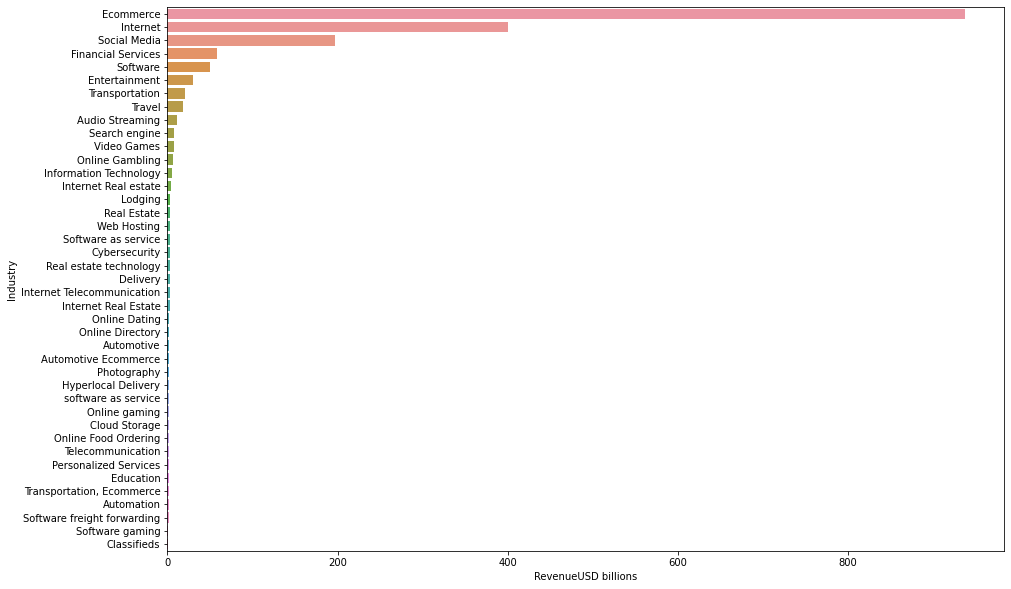

In [8]:
#Agrupamos por industrias la suma total y ordenamos descendentemente
industrias = df.groupby('Industry')['RevenueUSD billions'].sum().reset_index().sort_values(by = 'RevenueUSD billions', ascending=False)

# fijamos el tamano de la grafica
plt.subplots(figsize = (15,10))

# creamos la grafica de barras
sns.barplot(data=industrias,x='RevenueUSD billions',y='Industry',order = industrias['Industry'])

Podemos observar que las tres primeras categorias son valores extremos de nuestro df que no nos dejan comparar bien el resto de categorias. Ya que sabemos que estas tres categorias son las que mas facturan con una gran diferencia del resto podemos hacer un zoom en el resto para compararlas mejor

<AxesSubplot: xlabel='RevenueUSD billions', ylabel='Industry'>

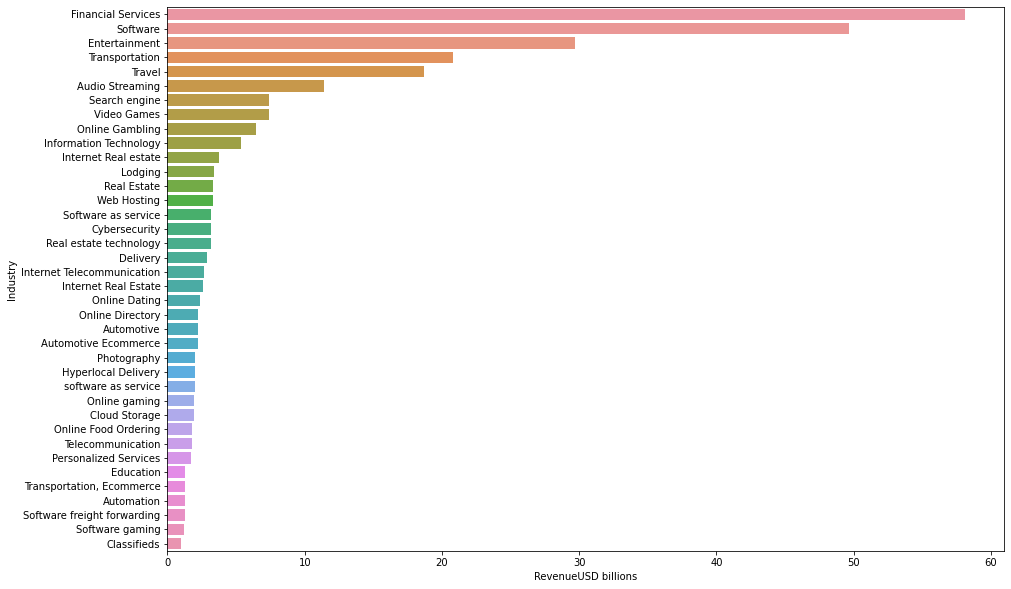

In [9]:
# fijamos el tamano de la grafica
plt.subplots(figsize = (15,10))

# creamos la grafica de barras
sns.barplot(data=industrias,x='RevenueUSD billions',y='Industry',order = industrias['Industry'].iloc[3:])

In [10]:
#Creamos la tabla agrupada por industrias con su total facturado y el conteo total de empresas
industrias = df.groupby('Industry')['RevenueUSD billions'].agg(Revenue_in_billions = 'sum',Company_count = 'count')
industrias = industrias.sort_values('Revenue_in_billions', ascending = False)

total_facturado = industrias['Revenue_in_billions'].sum()

# Creamos la columna 'Participacion' que nos indica el marketshare de la industria
industrias['Participacion'] = industrias['Revenue_in_billions'].apply(lambda x: x/total_facturado*100)

industrias

,Revenue_in_billions,Company_count,Participacion
Industry,,,
Ecommerce,937.52,30,51.73
Internet,400.17,13,22.08
Social Media,196.60,6,10.85
Financial Services,58.08,5,3.20
Software,49.68,7,2.74
Entertainment,29.70,1,1.64
Transportation,20.82,3,1.15
Travel,18.68,5,1.03
Audio Streaming,11.44,1,0.63


Como podemos observar en la tabla anterior las primeras tres categorias se quedan con mas del 80% del mercado, con un recuento de 49 empresas de las 106 totales. Esto quiere decir que son categorias con mayor demanda donde varias empresas pueden competir y aun asi facturar mas de un billon de dolares, el cual es el minimo de facturacion de este data frame.

Algo muy interesante que resalta a la vista son las 3 categorias con solo una empresa dentro de ellas que facturan mas de 5 billones. Lo cual nos dice que son dueñas de un gran monopolio

In [11]:
# Buscamos las empresas de cada industria que se podria considerar monopolio
condicion = (df['Industry'] == 'Entertainment') | (df['Industry'] == 'Audio Streaming') | (df['Industry'] == 'Search engine')
monopolios = df.loc[condicion]

monopolios

,Rank,Company,RevenueUSD billions,Employees,Market cap.USD billions,Headquarters,Founded,Industry
7,8,Netflix,29.70,"12,135.00",267.46,Los Gatos,1997,Entertainment
23,24,Spotify,11.44,"8,230.00",44.82,Stockholm New York [40],2006,Audio Streaming
28,29,Yahoo,7.40,"10,030.00",NaN,Sunnyvale,2017,Search engine


<AxesSubplot: xlabel='Founded', ylabel='Company_Count'>

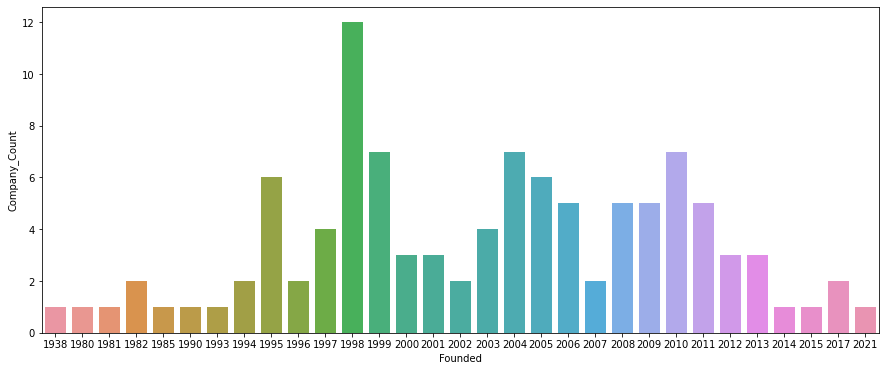

In [12]:
plt.subplots(figsize=(15,6))

datos = df.groupby('Founded')['Company'].count().reset_index()

datos.rename(columns = {'Company':'Company_Count'}, inplace = True)

sns.barplot(data = datos, x='Founded', y='Company_Count')

## Analisis bivariado

En este apartado veremos como se comportan entre si nuestras variables numericas para responder preguntas como:
- Entre mas empleados mayor la facturacion?
- Existe alguna correlacion entre el market cap y su facturacion?

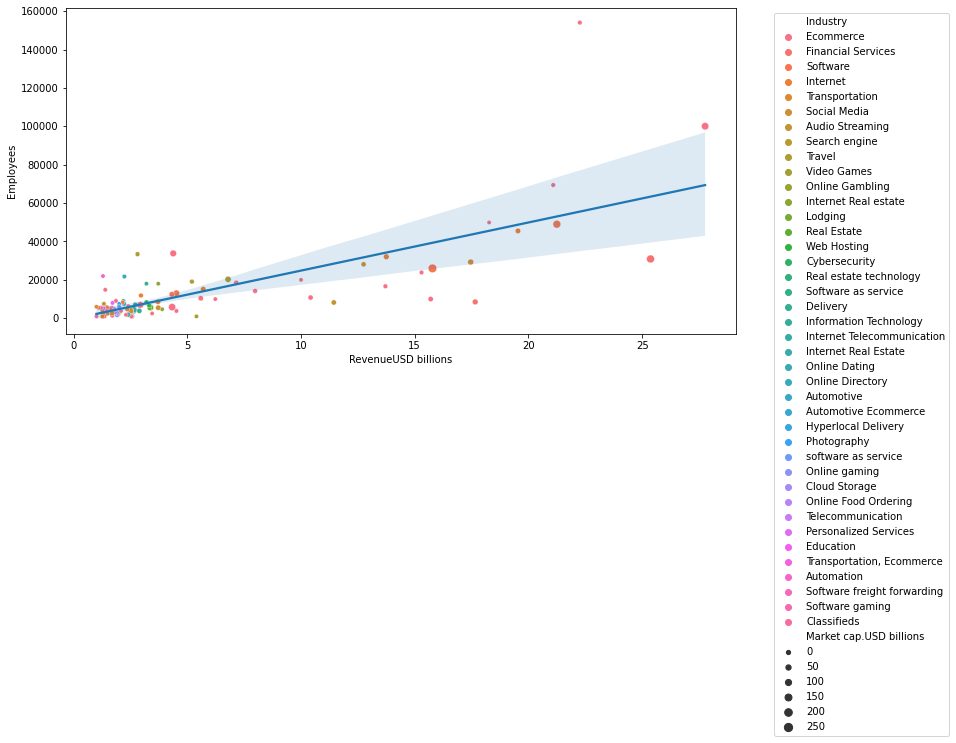

In [13]:
plt.subplots(figsize=(12,6))

# Como se menciono anterior mente existen valores atipicos en este df, por lo cual excluiremos el top 7.75% de los registros
data = df[df['RevenueUSD billions'] < df['RevenueUSD billions'].quantile(0.925)]

# Creamos el grafico de dispersion
sns.scatterplot(data=data,x='RevenueUSD billions',y='Employees',hue='Industry',size='Market cap.USD billions')

# Dibujamos la linea de regresion
sns.regplot(data=data,x='RevenueUSD billions',y='Employees',scatter = False)

# Sacamos las etiquetas
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Como podemos observar en el grafico anterior vemos que por regla general existe una correlacion positiva entre el numero de empleados que las companias tienen y el monto que estas facturan, aunque existen empresas que son mas eficientes que otras y logran una mayor facturacion con menor cantidad de empleados.

Para un analisis mas a profundidad podemos excluir todas las industrias que contengan a solo una empresa y asi comparar entre industrias de una manera mas eficiente

In [14]:
# Creamos la lista de industrias con dos o mas empresas
lista_industrias = industrias.reset_index()
lista_i = lista_industrias[lista_industrias['Company_count'] > 1]
lista_i = lista_i['Industry'].tolist()
lista_i

['Ecommerce',
 'Internet',
 'Social Media',
 'Financial Services',
 'Software',
 'Transportation',
 'Travel',
 'Video Games',
 'Online Gambling',
 'Information Technology']

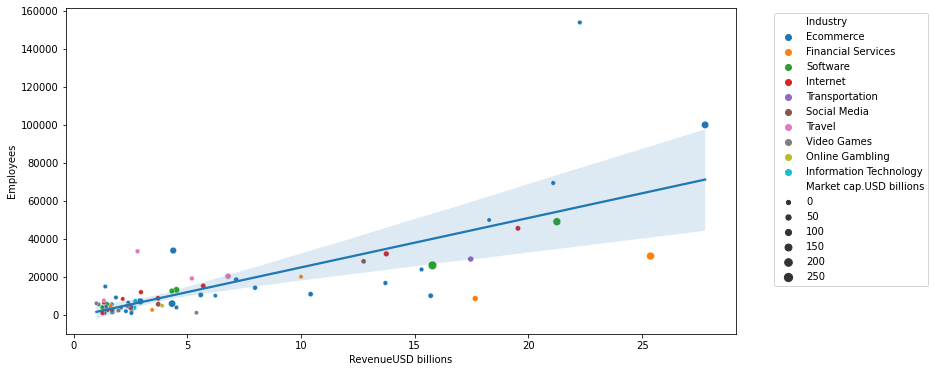

In [15]:
plt.subplots(figsize=(12,6))

# Filtramos por nuestra lista de empresas
competencia = data[data['Industry'].isin(lista_i)]

# Creamos el grafico de dispersion
sns.scatterplot(data=competencia,x='RevenueUSD billions',y='Employees',hue='Industry',size='Market cap.USD billions')

# Dibujamos la linea de regresion
sns.regplot(data=competencia,x='RevenueUSD billions',y='Employees',scatter = False)

# Sacamos las etiquetas
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<AxesSubplot: xlabel='RevenueUSD billions', ylabel='Market cap.USD billions'>

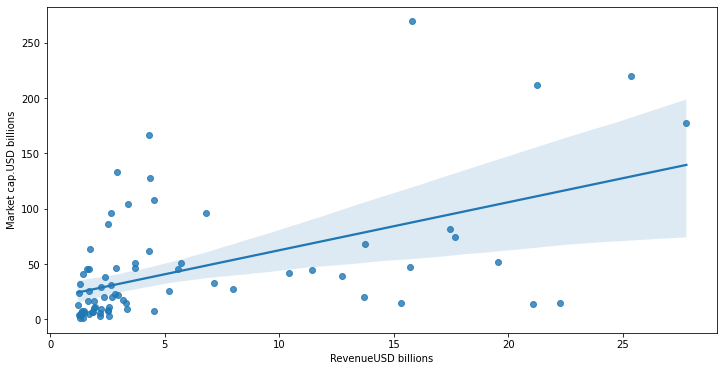

In [16]:
plt.subplots(figsize=(12,6))

# Excluimos los valores menores a 0
filtrado = data[data['Market cap.USD billions'] > 0]

# Comparamos el 'RevenueUSD billions' contra el 'Market cap.USD billions'
sns.regplot(data=filtrado,x='RevenueUSD billions',y='Market cap.USD billions')

El grafico anteiror nos muestra que si existe una correlacion positiva entre el market cap de la empresa y sus nivel de facturacion, esto quiere decir que en general entre mayor es su nivel de facturacion mayor sera su valuacion en el mercado bursatil. 

Claro esta que este simple grafico no toma en consideracion multiples factores como: potencial crecimiento de la empresa, si es o no un mercado nicho, sus finanzas y multiples factores mas que toman en cuenta los inversionistas a la hora de depositar su dinero en una empresa